In [1]:
%matplotlib inline
import os
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

C:\Users\Administrator\.conda\envs\tensorflow\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LOADING DATA_SET

In [2]:
aisles_df=pd.read_csv('aisles.csv')
departments_df =pd.read_csv('departments.csv')
orders_df =pd.read_csv('orders.csv')
products_df =pd.read_csv('products.csv')
orders_products_prior_df =pd.read_csv('order_products__prior.csv')
orders_products_train_df=pd.read_csv('order_products__train.csv')

Exploring orders data set

In [3]:
print('Total unique Count:')
orders_df.nunique()

Total unique Count:


order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [4]:
orders_df.groupby(['user_id','eval_set']).size().reset_index().rename(columns={0:'Number Of orders'}).head(10)

,user_id,eval_set,Number Of orders
0,1,prior,10
1,1,train,1
2,2,prior,14
3,2,train,1
4,3,prior,12
5,3,test,1
6,4,prior,5
7,4,test,1
8,5,prior,4
9,5,train,1


In [5]:
num_orders_by_user = orders_df.groupby(['user_id']).size().reset_index().rename(columns={0:'Number_orders'})

In [6]:
# We can use the fivethirtyeight style with Matplotlib, which is a little bit nicer-looking than the standard style.
matplotlib.style.use('fivethirtyeight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028FC977ABE0>,
      dtype=object)

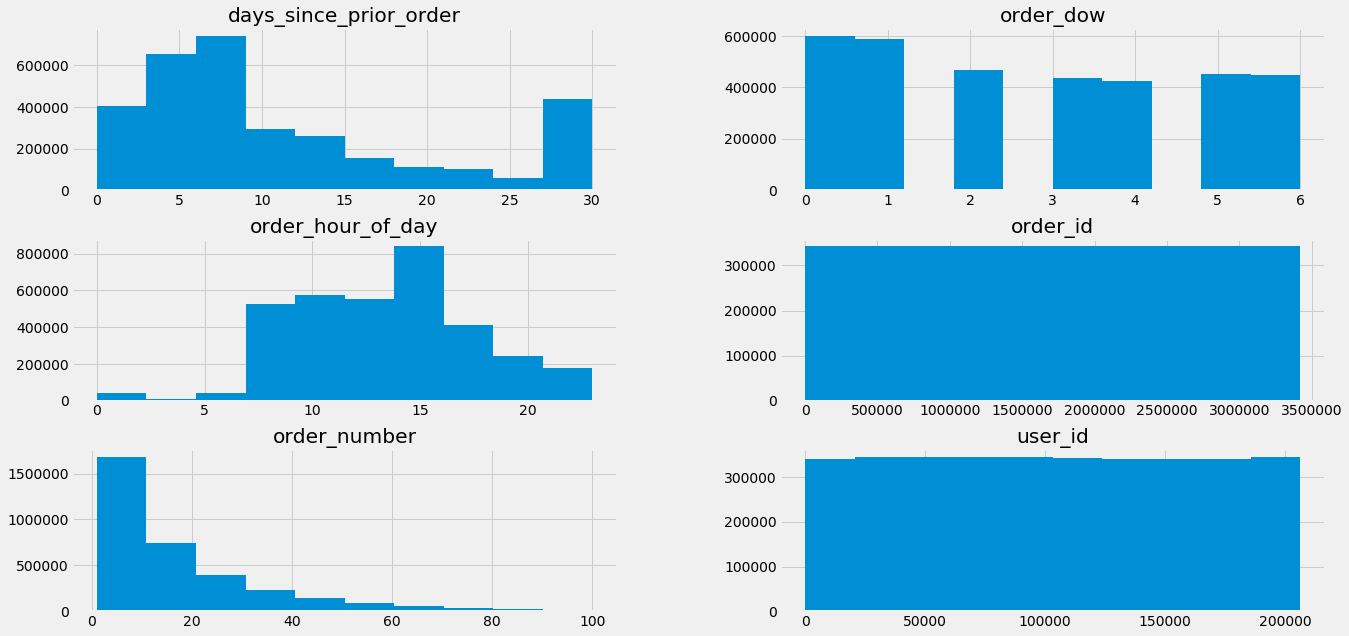

In [7]:
orders_df.hist(figsize=(20,10)) # Histogram for all features

#We know that the number of orders per customer is between 4 and 100 orders,

#it will be interesting to see the distrubition of the order count across number of users

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

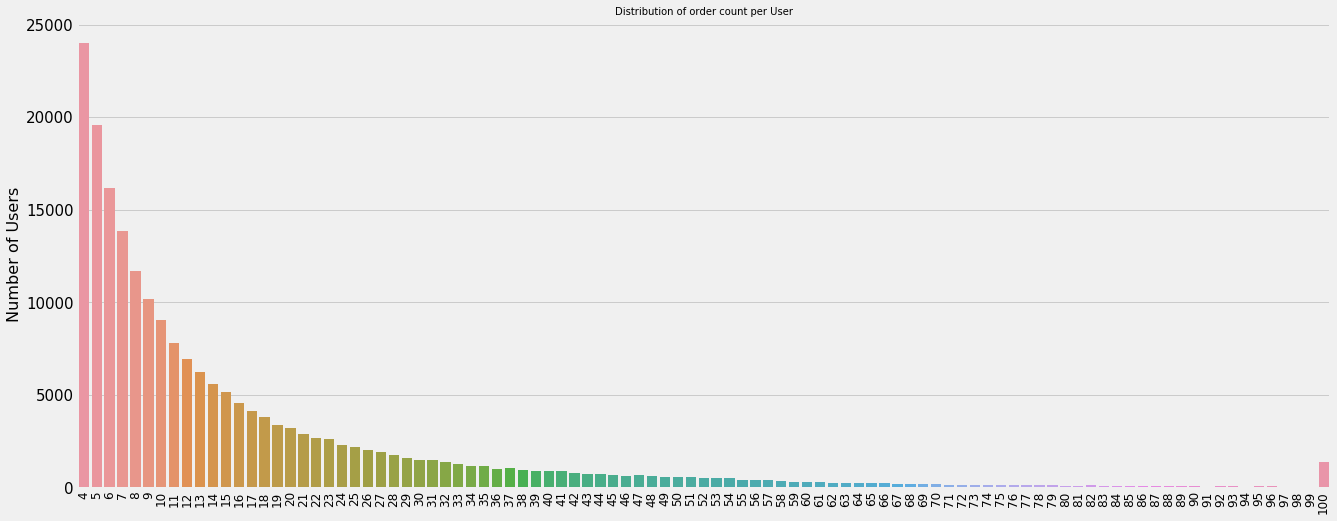

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(x=num_orders_by_user.Number_orders)

plt.title("Distribution of order count per User", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12,rotation='vertical')
plt.ylabel('Number of Users', fontsize=16)
plt.yticks(fontsize=15)

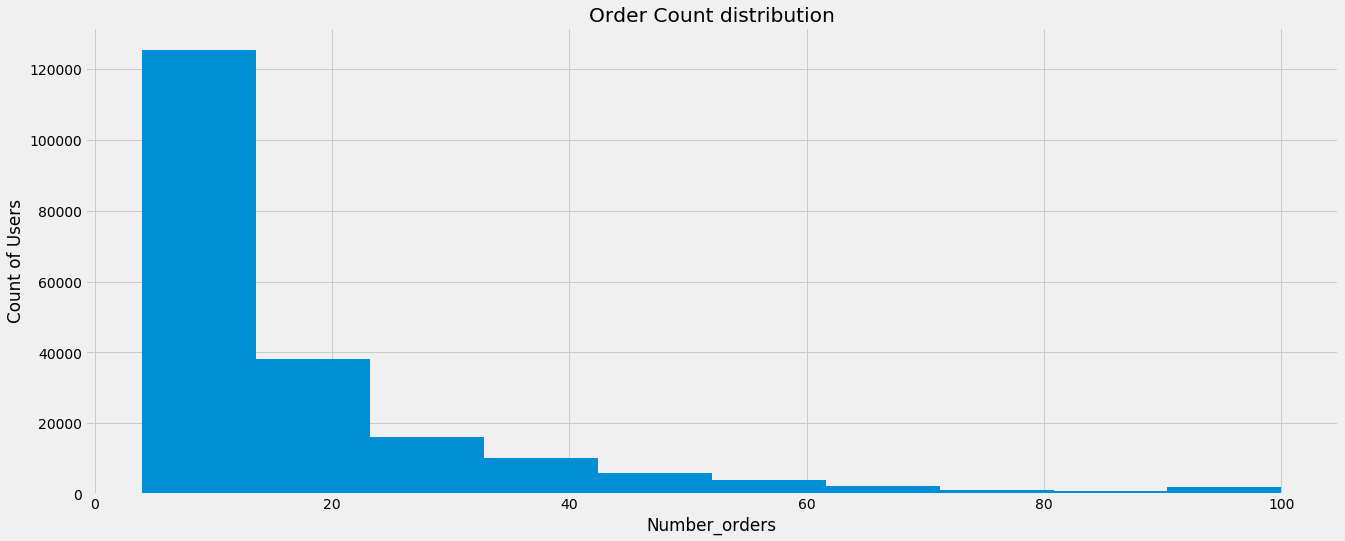

In [9]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.hist(num_orders_by_user['Number_orders'], bins = 10, range = (num_orders_by_user['Number_orders'].min(),num_orders_by_user['Number_orders'].max()))
plt.title('Order Count distribution')
plt.xlabel('Number_orders')
plt.ylabel('Count of Users')
plt.show()

Majority of users have between 4 and 10 orders in the dataset

In [10]:
orders_df.groupby('eval_set').size().reset_index().rename(columns={0:'Number Of orders'})

,eval_set,Number Of orders
0,prior,3214874
1,test,75000
2,train,131209


In [11]:
dow_list = [['Sunday', 1], ['Monday', 2], ['Tuesday', 3], ['Wednesday', 4], ['Thursday', 5], ['Friday', 6], ['Saturday', 0]]
dow_df = pd.DataFrame(dow_list, columns = ['DOW_name', 'order_dow'])

In [12]:
orders_df = pd.merge(orders_df, dow_df, on='order_dow')

In [13]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,DOW_name
0,2539329,1,prior,1,2,8,NaN,Monday
1,3367565,1,prior,6,2,7,19.0,Monday
2,2168274,2,prior,1,2,11,NaN,Monday
3,738281,2,prior,4,2,10,8.0,Monday
4,1199898,2,prior,6,2,9,13.0,Monday


In [14]:
orders_df.sort_values(by=['order_dow'], ascending=True,inplace=True)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text yticklabel objects>)

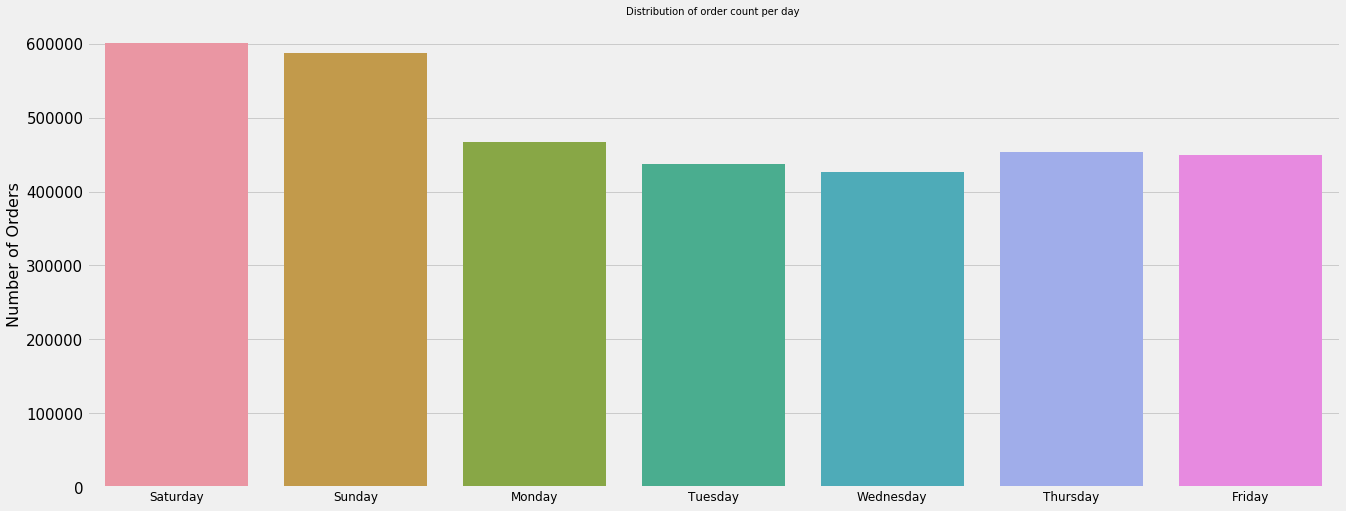

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(x=orders_df.DOW_name)

plt.title("Distribution of order count per day", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Number of Orders', fontsize=16)
plt.yticks(fontsize=15)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]), <a list of 8 Text yticklabel objects>)

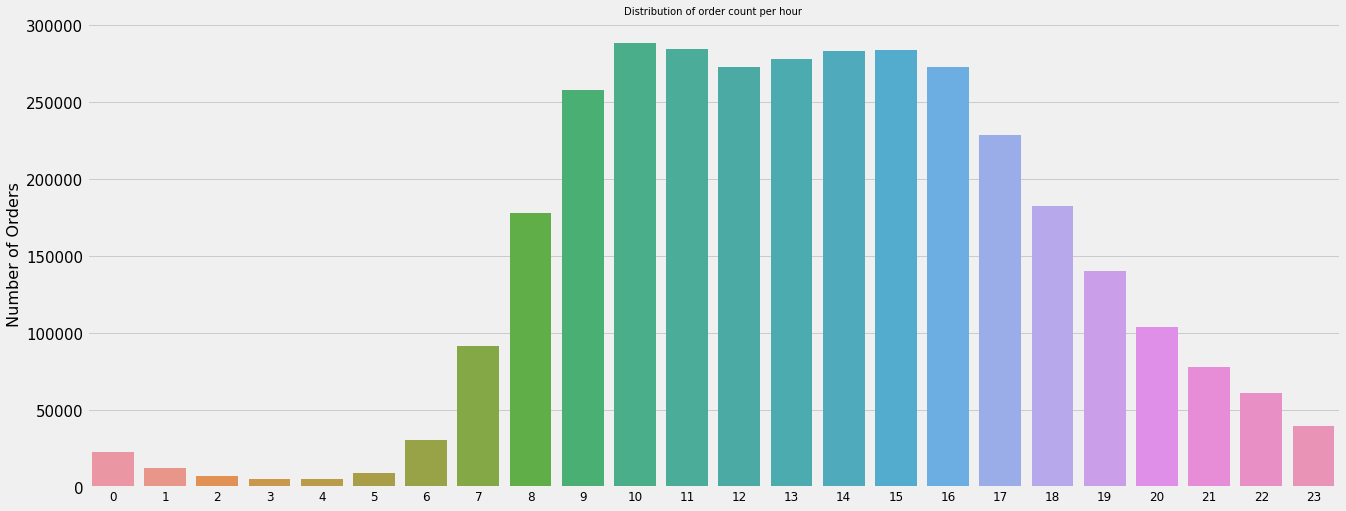

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(x=orders_df.order_hour_of_day)

plt.title("Distribution of order count per hour", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Number of Orders', fontsize=16)
plt.yticks(fontsize=15)

In [17]:
orders_df['user_total_orders'] =(
    orders_df.sort_values(by=['user_id', 'order_number'],ascending=False)
    .groupby('user_id',as_index=False)
    ['order_number'].nth(0))

In [18]:
orders_count = orders_df.groupby('user_id').size().reset_index().rename(columns={0:'user_total_orders_count'})
orders = pd.merge(orders_df, orders_count, on='user_id')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,DOW_name,user_total_orders,user_total_orders_count
0,9862,2342,prior,6,0,12,7.0,Saturday,NaN,18
1,260377,2342,prior,11,0,14,7.0,Saturday,NaN,18
2,264158,2342,prior,10,0,17,7.0,Saturday,NaN,18
3,296583,2342,prior,9,0,16,28.0,Saturday,NaN,18
4,1227178,2342,prior,8,0,15,8.0,Saturday,NaN,18


Exploring order_products data set

In [19]:
print('Total unique Count:')
orders_df.nunique()

Total unique Count:


order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
DOW_name                        7
user_total_orders              97
dtype: int64

In [20]:
orders_df.groupby(['user_id','eval_set']).size().reset_index().rename(columns={0:'Number Of orders'}).head(10)

,user_id,eval_set,Number Of orders
0,1,prior,10
1,1,train,1
2,2,prior,14
3,2,train,1
4,3,prior,12
5,3,test,1
6,4,prior,5
7,4,test,1
8,5,prior,4
9,5,train,1


In [21]:
num_orders_by_user = orders_df.groupby(['user_id']).size().reset_index().rename(columns={0:'Number_orders'})

In [22]:
# We can use the fivethirtyeight style with Matplotlib, which is a little bit nicer-looking than the standard style.
matplotlib.style.use('fivethirtyeight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F80C51C50>,
      dtype=object)

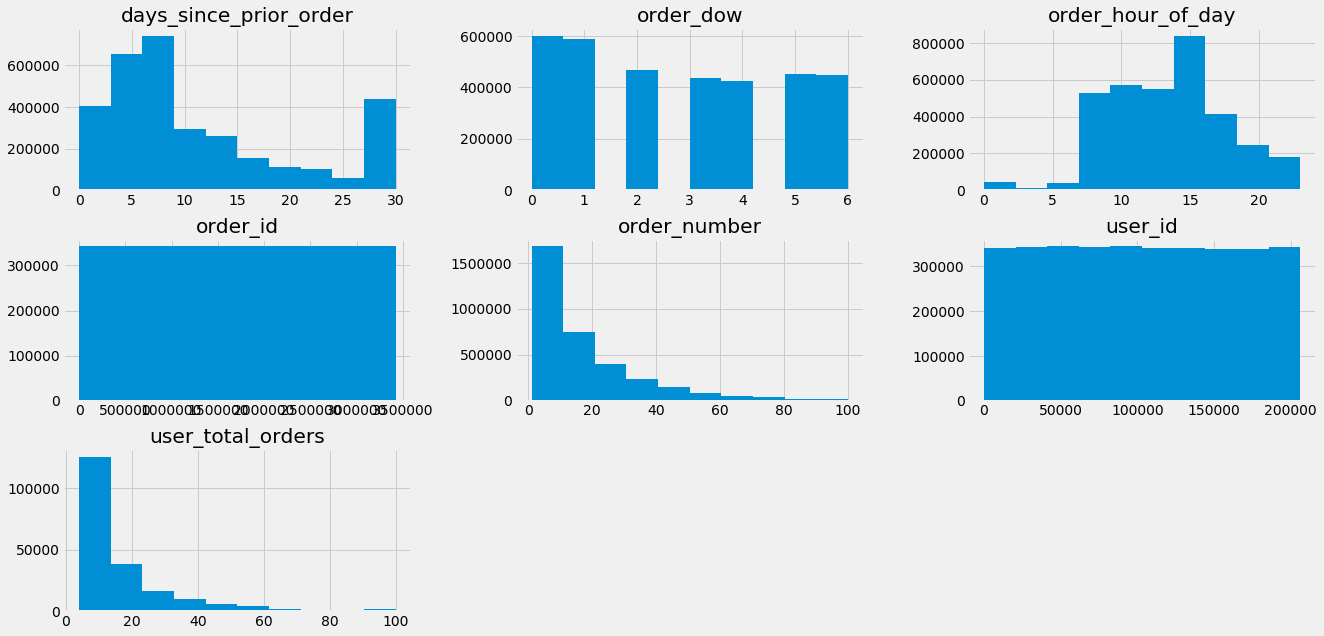

In [23]:
orders_df.hist(figsize=(20,10)) # Histogram for all features

#We know that the number of orders per customer is between 4 and 100 orders,

#it will be interesting to see the distrubition of the order count across number of users

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

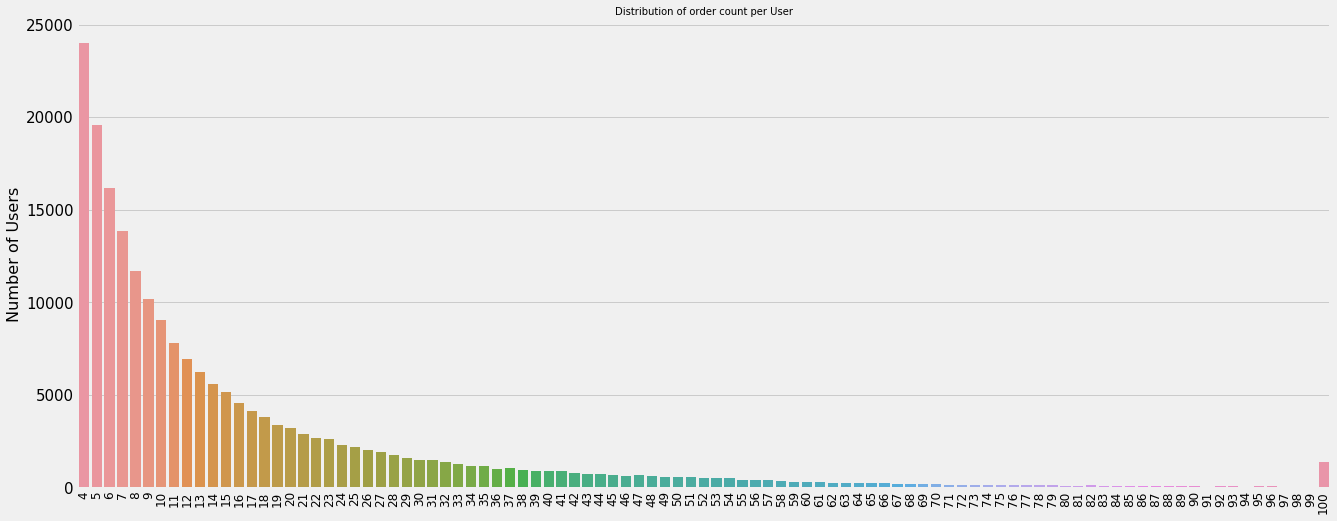

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x=num_orders_by_user.Number_orders)

plt.title("Distribution of order count per User", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12,rotation='vertical')
plt.ylabel('Number of Users', fontsize=16)
plt.yticks(fontsize=15)

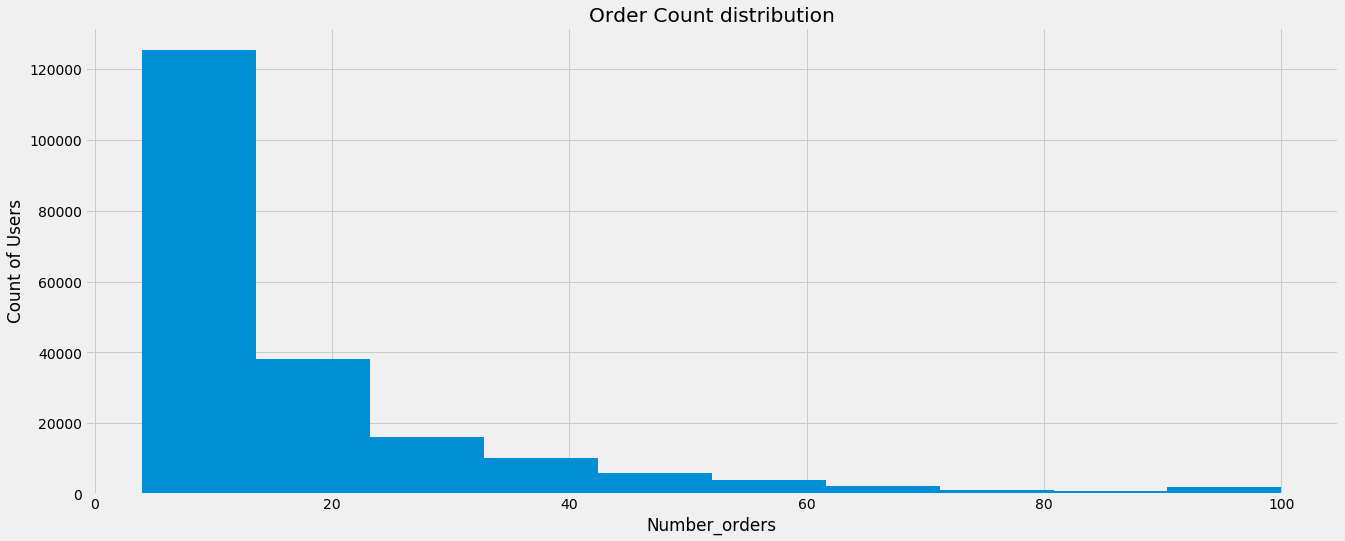

In [25]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.hist(num_orders_by_user['Number_orders'], bins = 10, range = (num_orders_by_user['Number_orders'].min(),num_orders_by_user['Number_orders'].max()))
plt.title('Order Count distribution')
plt.xlabel('Number_orders')
plt.ylabel('Count of Users')
plt.show()

Majority of users have between 4 and 10 orders in the dataset

In [26]:
orders_df.groupby('eval_set').size().reset_index().rename(columns={0:'Number Of orders'})

,eval_set,Number Of orders
0,prior,3214874
1,test,75000
2,train,131209


In [27]:
dow_list = [['Sunday', 1], ['Monday', 2], ['Tuesday', 3], ['Wednesday', 4], ['Thursday', 5], ['Friday', 6], ['Saturday', 0]]
dow_df = pd.DataFrame(dow_list, columns = ['DOW_name1', 'order_dow'])

In [28]:
orders_df = pd.merge(orders_df, dow_df, on='order_dow')
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,DOW_name,user_total_orders,DOW_name1
0,9862,2342,prior,6,0,12,7.0,Saturday,NaN,Saturday
1,2845134,68761,prior,37,0,14,7.0,Saturday,NaN,Saturday
2,745290,68761,prior,36,0,17,1.0,Saturday,NaN,Saturday
3,1909,68761,prior,33,0,13,0.0,Saturday,NaN,Saturday
4,2689577,68761,prior,32,0,11,7.0,Saturday,NaN,Saturday


In [29]:
orders_df.sort_values(by=['order_dow'], ascending=True,inplace=True)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text yticklabel objects>)

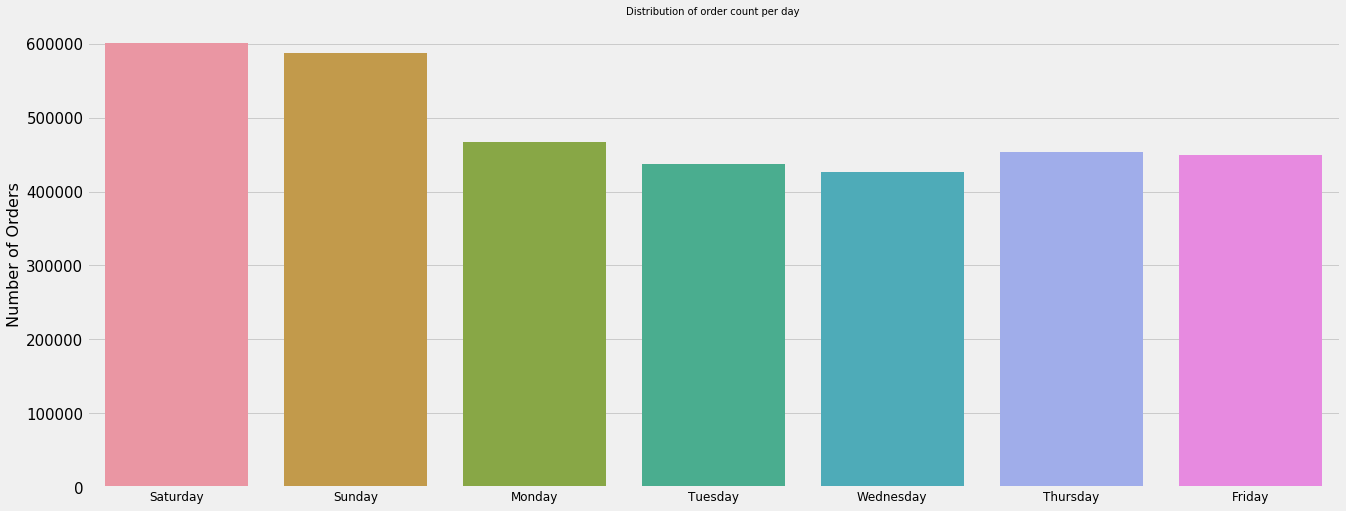

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(x=orders_df.DOW_name1)
plt.title("Distribution of order count per day", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Number of Orders', fontsize=16)
plt.yticks(fontsize=15)

it seems that the weekend has the most orders placed by users

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]), <a list of 8 Text yticklabel objects>)

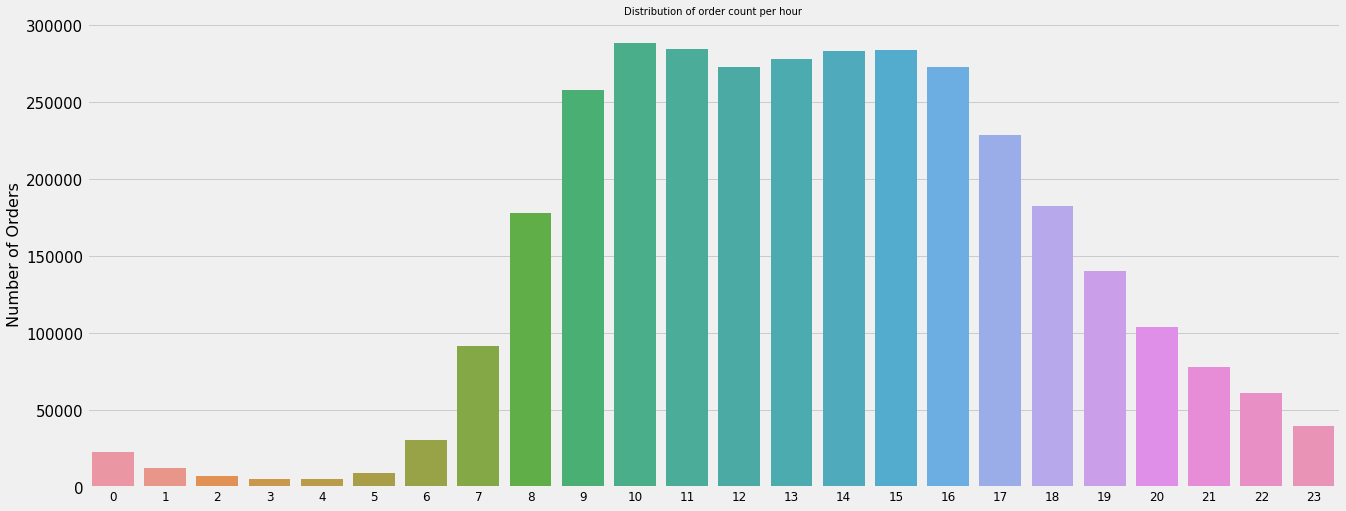

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(x=orders_df.order_hour_of_day)

plt.title("Distribution of order count per hour", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Number of Orders', fontsize=16)
plt.yticks(fontsize=15)

In [32]:
orders_df['user_total_orders'] = (
    orders_df.sort_values(by=['user_id', 'order_number'],ascending=False)
    .groupby('user_id',as_index=False)
    ['order_number'].nth(0)
)

In [33]:
orders_count = orders_df.groupby('user_id').size().reset_index().rename(columns={0:'user_total_orders_count'})
orders = pd.merge(orders_df, orders_count, on='user_id')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,DOW_name,user_total_orders,DOW_name1,user_total_orders_count
0,9862,2342,prior,6,0,12,7.0,Saturday,NaN,Saturday,18
1,260377,2342,prior,11,0,14,7.0,Saturday,NaN,Saturday,18
2,264158,2342,prior,10,0,17,7.0,Saturday,NaN,Saturday,18
3,1227178,2342,prior,8,0,15,8.0,Saturday,NaN,Saturday,18
4,2447775,2342,prior,5,0,11,18.0,Saturday,NaN,Saturday,18


Exploring order_products data set

In [34]:
orders_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [35]:
orders_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


To get the total order_products data, let's concatenate these 2 datasets

In [36]:
order_products_total_df = pd.concat([orders_products_prior_df, orders_products_train_df]) 
order_products_total_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [37]:
reordered_df = pd.DataFrame([['Reordered', 1], ['Not-Reordered', 0]], columns = ['is_reordred','reordered'])
order_products_total_df = pd.merge(order_products_total_df, reordered_df, on='reordered')
order_products_total_df.groupby('is_reordred').size().reset_index().rename(columns={0:'Number Of products'})

,is_reordred,Number Of products
0,Not-Reordered,13863746
1,Reordered,19955360


In [38]:
orders_products_train_df.groupby('reordered').size().reset_index().rename(columns={0:'Number Of products'})

,reordered,Number Of products
0,0,555793
1,1,828824


(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000.]),
 <a list of 10 Text yticklabel objects>)

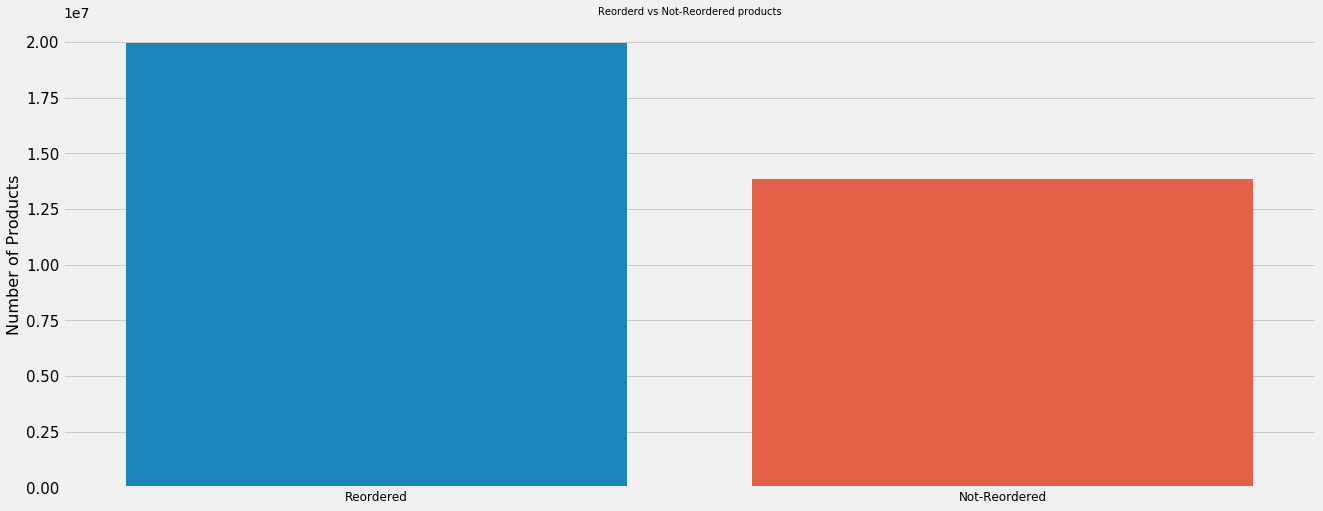

In [39]:
plt.figure(figsize=(20,8))
sns.countplot(x=order_products_total_df.is_reordred)

plt.title("Reorderd vs Not-Reordered products", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Number of Products', fontsize=16)
plt.yticks(fontsize=15)

let's see what products are most reordered. but First need first to merge the products dataframe with order_products dataframe to get the product names

In [40]:
order_products_total_df = pd.merge(order_products_total_df, products_df, on='product_id')

In [41]:
order_products_total_df[(order_products_total_df.product_name == 'Banana')][order_products_total_df.reordered ==0].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


order_id             76125
product_id           76125
add_to_cart_order    76125
reordered            76125
is_reordred          76125
product_name         76125
aisle_id             76125
department_id        76125
dtype: int64

In [42]:
products_order_freq = order_products_total_df.groupby(['product_name','department_id', 'aisle_id']).size().reset_index().rename(columns={0:'order_count'})
products_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)

In [43]:
#Top most ordered products are produce
products_order_freq.head(10)

,product_name,department_id,aisle_id,order_count
3677,Banana,4,24,491291
3472,Bag of Organic Bananas,4,24,394930
31923,Organic Strawberries,4,24,275577
28843,Organic Baby Spinach,4,123,251705
30300,Organic Hass Avocado,4,24,220877
28807,Organic Avocado,4,24,184224
22415,Large Lemon,4,24,160792
42908,Strawberries,4,24,149445
23422,Limes,4,24,146660
32481,Organic Whole Milk,16,84,142813


Looks like the most ordered products are fruits and vegetables. let's merge the department and aisle dataframes to have a better picture

In [44]:
order_products_total_df = pd.merge(order_products_total_df, aisles_df, on='aisle_id')
order_products_total_df = pd.merge(order_products_total_df, departments_df, on='department_id')
products_order_freq.head(10)

,product_name,department_id,aisle_id,order_count
3677,Banana,4,24,491291
3472,Bag of Organic Bananas,4,24,394930
31923,Organic Strawberries,4,24,275577
28843,Organic Baby Spinach,4,123,251705
30300,Organic Hass Avocado,4,24,220877
28807,Organic Avocado,4,24,184224
22415,Large Lemon,4,24,160792
42908,Strawberries,4,24,149445
23422,Limes,4,24,146660
32481,Organic Whole Milk,16,84,142813


In [45]:
order_products_total_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,is_reordred,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
1,327,33120,5,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
2,390,33120,28,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
3,537,33120,2,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
4,582,33120,7,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
5,608,33120,5,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
6,623,33120,1,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
7,689,33120,4,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
8,726,33120,3,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
9,771,33120,29,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs


In [46]:
products_order_freq.head(10)

,product_name,department_id,aisle_id,order_count
3677,Banana,4,24,491291
3472,Bag of Organic Bananas,4,24,394930
31923,Organic Strawberries,4,24,275577
28843,Organic Baby Spinach,4,123,251705
30300,Organic Hass Avocado,4,24,220877
28807,Organic Avocado,4,24,184224
22415,Large Lemon,4,24,160792
42908,Strawberries,4,24,149445
23422,Limes,4,24,146660
32481,Organic Whole Milk,16,84,142813


In [47]:
department_order_freq = order_products_total_df.groupby(['department','is_reordred']).size().reset_index().rename(columns={0:'order_count'})
aisle_order_freq = order_products_total_df.groupby(['aisle','is_reordred']).size().reset_index().rename(columns={0:'order_count'})
department_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)
department_order_freq.head(21)

,department,is_reordred,order_count
39,produce,Reordered,6432596
15,dairy eggs,Reordered,3773723
38,produce,Not-Reordered,3455782
14,dairy eggs,Not-Reordered,1857344
7,beverages,Reordered,1832952
41,snacks,Reordered,1727075
40,snacks,Not-Reordered,1279337
32,pantry,Not-Reordered,1277020
21,frozen,Reordered,1268058
20,frozen,Not-Reordered,1068800


In [48]:
aisle_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)
aisle_order_freq.head(5)

,aisle,is_reordred,order_count
101,fresh fruits,Reordered,2726251
107,fresh vegetables,Reordered,2123540
106,fresh vegetables,Not-Reordered,1445090
197,packaged vegetables fruits,Reordered,1178700
100,fresh fruits,Not-Reordered,1066410


In [49]:
dep_aisle_order_freq = order_products_total_df.groupby(['department','aisle','is_reordred']).size().reset_index().rename(columns={0:'order_count'})
dep_aisle_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)
dep_aisle_order_freq.head(5)

,department,aisle,is_reordred,order_count
237,produce,fresh fruits,Reordered,2726251
241,produce,fresh vegetables,Reordered,2123540
240,produce,fresh vegetables,Not-Reordered,1445090
245,produce,packaged vegetables fruits,Reordered,1178700
236,produce,fresh fruits,Not-Reordered,1066410


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000.]), <a list of 7 Text yticklabel objects>)

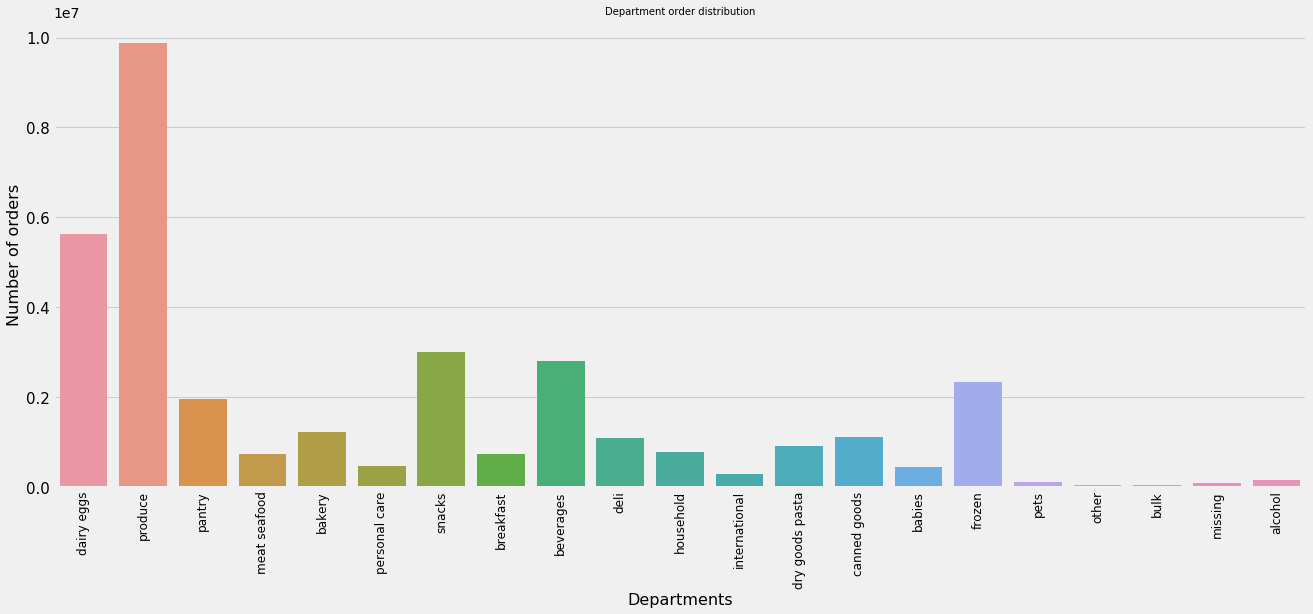

In [50]:
plt.figure(figsize=(20,8))
sns.countplot(x=order_products_total_df.department)

plt.title("Department order distribution", fontsize=10)
plt.xlabel('Departments', fontsize=16)
plt.xticks(fontsize=12, rotation = 'vertical')
plt.ylabel('Number of orders', fontsize=16)
plt.yticks(fontsize=15)

In [51]:
order_products_total_df = pd.merge(order_products_total_df, orders_df, on='order_id')
order_products_total_df.head(5)

,order_id,product_id,add_to_cart_order,reordered,is_reordred,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,DOW_name,user_total_orders,DOW_name1
0,2,33120,1,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,Thursday,NaN,Thursday
1,2,28985,2,1,Reordered,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,Thursday,NaN,Thursday
2,2,17794,6,1,Reordered,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,Thursday,NaN,Thursday
3,2,43668,9,0,Not-Reordered,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0,Thursday,NaN,Thursday
4,2,45918,4,1,Reordered,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,Thursday,NaN,Thursday


In [ ]:
order_products_total_df = pd.merge(order_products_total_df, orders_df, on='order_id')
order_products_total_df.head(5)

In [ ]:
col_y = ['user_id_y', 'eval_set_y', 'order_number_y', 'order_dow_y', 'order_hour_of_day_y', 'days_since_prior_order_y' , 'DOW_name_y']
order_products_total_df = order_products_total_df.drop(col_y, axis =1)

In [ ]:
order_hour_traffic = order_products_total_df.groupby(['department','order_hour_of_day_x']).size().reset_index().rename(columns={0:'order_count'})

In [ ]:
# create plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(15, 8), dpi=200)

# plot data
sns.lineplot(x='order_hour_of_day_x', y='order_count',  
             hue='department', linewidth=1.5, data=order_hour_traffic)

# set legend outside the plot             
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=12)
plt.title('Order traffic Per Hour during the day', fontsize=16)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

In [ ]:
orders_products_train_df = pd.merge(orders_products_train_df, orders_df, on='order_id')
orders_products_train_df.head()

In [ ]:

# now we want to know if the products that are in orders_prior 
# ended up in the baskets in orders_train (= our target 'yes'[1] or 'no'[0])

# accumulate orders_train to create carts from last order
train_carts = (orders_products_train_df.groupby('user_id',as_index=False) #  group by users
                                      .agg({'product_id':(lambda x: list(x))}) # create a list of the products in the cart
                                      .rename(columns={'product_id':'user_cart_current_contents'}))

In [ ]:
train_carts.head(10)

In [ ]:
train_carts = (order_products_train_df.groupby('user_id',as_index=False)
                                      .agg({'product_id':(lambda x: set(x))})
                                      .rename(columns={'product_id':'latest_cart'}))
df_X = df_X.merge(train_carts, on='user_id')
df_X['in_cart'] = (df_X.apply(lambda row: row['product_id'] in row['latest_cart'], axis=1).astype(int))

Exploring User features

In [ ]:
orders_df[orders_df.user_id == 206209]

In [ ]:
orders_df['user_days_since_order'] = (orders_df.sort_values(by=['user_id','order_number'], ascending=False)
                .groupby(['user_id'])
                ['days_since_prior_order'].apply(lambda x: x.cumsum())).shift(1)

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=orders_df.days_since_prior_order)
plt.title("order distribution", fontsize=10)
plt.xlabel('days between each order', fontsize=16)
plt.xticks(fontsize=12, rotation = 'horizontal')
plt.ylabel('Number of orders', fontsize=16)
plt.yticks(fontsize=15)

In [ ]:
orders_df['days_since_prior_order'].max()

In [ ]:
orders_df.groupby('days_since_prior_order').size().reset_index().rename(columns={0:'order_count'}).head()

In [ ]:
user_df = orders_df.groupby(['user_id']).size().reset_index().rename(columns={0:'user_total_orders_count'})

In [ ]:
user_df.head()

In [ ]:
user_df['days_between_second_and_first_orders'] = list(orders_df[orders_df.order_number ==2]['days_since_prior_order'])
user_df[user_df['days_between_second_and_first_orders'] <30].count()

In [ ]:
user_df['days_between_third_and_second_orders'] = list(orders_df[orders_df.order_number ==3]['days_since_prior_order'])
user_df['days_between_third_and_second_orders'].max()

In [ ]:
user_df['days_between_fourth_and_third_orders'] = list(orders_df[orders_df.order_number ==4]['days_since_prior_order'])
user_df['days_between_fourth_and_third_orders'].max()

In [ ]:
user_df['days_activities_period'] = list(orders_df.groupby(['user_id'])['days_since_prior_order'].apply(lambda x: x.sum()))

In [ ]:
user_df['user_days_between_orders_average'] = user_df['days_activities_period']/user_df['user_total_orders_count']
user_df.user_days_between_orders_average = user_df.user_days_between_orders_average.astype(int)

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=user_df.days_between_second_and_first_orders)
plt.title("User distribution", fontsize=10)
plt.xlabel('days between each order', fontsize=16)
plt.xticks(fontsize=12, rotation = 'horizontal')
plt.ylabel('Number of Users', fontsize=16)
plt.yticks(fontsize=15)

In [ ]:
user_df['reorder_before_30_days'] = np.where(user_df.days_between_second_and_first_orders == 30, 0, 1)

In [ ]:
user_df['reorder_within_11_days'] = np.where(user_df.days_between_second_and_first_orders > 11, 0, 1)

In [ ]:
user_df['reorder_biweekly'] = np.where(user_df.days_between_second_and_first_orders > 14, 0, 1)

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=user_df.reorder_before_30_days)
plt.title("User distribution", fontsize=10)
plt.xlabel('Reorder days within 30 days', fontsize=16)
plt.xticks(fontsize=12, rotation = 'horizontal')
plt.ylabel('Number of Users', fontsize=16)
plt.yticks(fontsize=15)

In [ ]:
# Data to plot
sizes = user_df['reorder_within_11_days'].value_counts(sort = True)
colors = ["blue","orange"] 
plt.rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=None, labels=['reorder_within_11_days', 'reorder_after_11_days'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Users reorders')
plt.show()

In [ ]:
# Data to plot
sizes = user_df['reorder_biweekly'].value_counts(sort = True)
colors = ["blue","orange"] 
plt.rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=None, labels=['14 days or less', 'greater than 14 days'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Users reordered biweekly')
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=user_df.reorder_biweekly)
plt.title("User distribution", fontsize=10)
plt.xlabel('biweekly reorder', fontsize=16)
plt.xticks(fontsize=12, rotation = 'horizontal')
plt.ylabel('Number of Users', fontsize=16)
plt.yticks(fontsize=15)

In [ ]:
user_df[user_df.days_between_second_and_first_orders > 14].count()

In [ ]:
order_products_total_df = pd.concat([orders_products_prior_df, orders_products_train_df ])

In [ ]:
order_products_total_df = pd.merge(order_products_total_df, orders_df, on='order_id')

In [ ]:
user_cart_contents = order_products_total_df[(order_products_total_df.order_number ==1) | (order_products_total_df.order_number ==2)].groupby(['user_id','order_number']).agg({'product_id':(lambda x:tuple(x))}).rename(columns={'product_id':'user_cart_contents'}).head()

In [ ]:
user_df['user_cart_size'] = [len(x) for x in user_df['user_cart_contents']]

In [ ]:
user_df['first_order_cart_content'] = list(order_products_total_df[order_products_total_df.order_number ==1].groupby(['user_id'])['product_id'].apply(lambda x:tuple(x)))

In [ ]:
user_df['second_order_cart_content'] = list(order_products_total_df[order_products_total_df.order_number ==2].groupby(['user_id'])['product_id'].apply(lambda x:tuple(x)))

In [ ]:
user_df['first_order_cart_size'] = [len(x) for x in user_df['first_order_cart_content']]
user_df['second_order_cart_size'] = [len(x) for x in user_df['second_order_cart_content']]

In [ ]:
# create plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(25, 10), dpi=200)

# plot data
sns.lineplot(x='user_total_orders_count', y='user_cumsum',  
             linewidth=1.5, data=user_df)

# set legend outside the plot             
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=12)
plt.title('User_Order Count distribution', fontsize=16)
plt.xlabel('User count', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

In [ ]:
user_df['user_cumsum'].plot()